In [20]:
# %matplotlib inline
# # %matplotlib notebook
%config InlineBackend.figure_format = 'png'
from Frame import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation


In [28]:
# teste
size = 10000
d = 100
taxis = []
for i in range(60):
    taxis+=[Taxi(i, random.uniform(-size/(2**(i/d)), size/(2**(i/d))), random.uniform(-size/(2**(i/d)), size/(2**(i/d))), random.choices([0,1])[0], random.choices([1,2,3,4])[0]) for i in range(100)]

f = Frame(taxis=taxis)
id = len(taxis)-1
# tt = f.scan_100(taxis[id].coord[0], taxis[id].coord[1])
# for t in tt:
#     t.plot(color='red', markersize=4)
# taxis[id].plot(color='blue', markersize=4)

# print(len(tt))
# plt.rcParams['figure.figsize'] = (11, 11)
# f.plot()
# print(f)

In [24]:
# install widgets
# jupyter labextension install @jupyter-widgets/jupyterlab-manager

from ipywidgets import IntSlider
slider = IntSlider(value=50)
slider

IntSlider(value=50)

In [3]:
df = pd.read_csv('offsets3.csv', header=None)
df = df.transform(lambda x: x.transform(lambda y: (float(y.split(' ')[0]), float(y.split(' ')[1]))) )
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1650,1651,1652,1653,1654,1655,1656,1657,1658,1659
0,"(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)",...,"(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)"
1,"(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)",...,"(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)"
2,"(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)",...,"(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)"
3,"(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)",...,"(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)"
4,"(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)",...,"(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)"


In [4]:
arr = df.to_numpy()


In [8]:
df2 = pd.DataFrame(arr[4000])
df2.head()
df2.to_csv('one_time.csv')

i: 0 - 8640len: 0
i: 100 - 8640len: 0
i: 200 - 8640len: 0
i: 300 - 8640len: 0
i: 400 - 8640len: 0
i: 500 - 8640len: 0
i: 600 - 8640len: 0
i: 700 - 8640len: 0
i: 800 - 8640len: 0
i: 900 - 8640len: 0


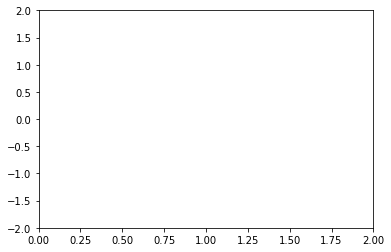

In [100]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2, marker='o', linestyle='')

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    l = [x for x in arr[0] if x[0]!= 0 or x[1]!= 0 ]
    x = [a[0] for a in l ]
    y = [a[1] for a in l ]
    line.set_data(x, y)
    if i%100 == 0:
        print('i: ' + str(i) + ' - ' + str(len(arr)) + ' - len: '+str(len(l)))
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, 1000,
                               init_func=init,  repeat=False, interval=5)

# anim = animation.FuncAnimation(fig, animate, init_func=init,
#                                frames=200, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
# plt.show()
plt.rcParams['animation.ffmpeg_path'] = '/usr/local/bin/ffmpeg'
HTML(anim.to_html5_video())
# anim.save('bloch_sphere.mp4', fps=20)

In [90]:
(1,2) == (1,2)

True

In [94]:
[x for x in arr[0] if x[0]!= 0 or x[1]!=0 ]

[]

In [49]:
arr

array([[(0.0, 0.0), (0.0, 0.0), (0.0, 0.0), ..., (0.0, 0.0), (0.0, 0.0),
        (0.0, 0.0)],
       [(0.0, 0.0), (0.0, 0.0), (0.0, 0.0), ..., (0.0, 0.0), (0.0, 0.0),
        (0.0, 0.0)],
       [(0.0, 0.0), (0.0, 0.0), (0.0, 0.0), ..., (0.0, 0.0), (0.0, 0.0),
        (0.0, 0.0)],
       ...,
       [(0.0, 0.0), (0.0, 0.0), (0.0, 0.0), ..., (0.0, 0.0),
        (-86234.683708, -104641.552075), (0.0, 0.0)],
       [(0.0, 0.0), (0.0, 0.0), (0.0, 0.0), ..., (0.0, 0.0),
        (-86234.683708, -104641.552075), (0.0, 0.0)],
       [(0.0, 0.0), (0.0, 0.0), (0.0, 0.0), ..., (0.0, 0.0),
        (-86234.683708, -104641.552075), (0.0, 0.0)]], dtype=object)

In [46]:
df3 = pd.read_csv('one_time.csv')
df3['0'] = df3['0'].map(lambda x: eval(x))

# arr2 = df3.to_numpy()
# [arr2[0][i][1] for i in range(len(arr2[0]))]

In [50]:
taxis = [Taxi(i, df3['0'][i][0], df3['0'][i][1], random.choices([0,1])[0], random.choices([1,2,3,4])[0]) for i in range(len(df3['0'])) if(df3['0'][i][0]!=0 or df3['0'][i][1]!=0)]


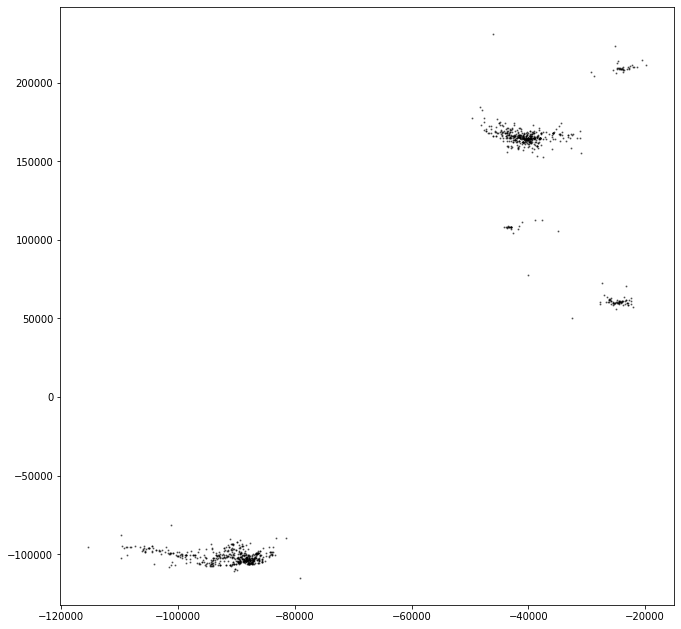

In [51]:
for t in taxis:
    t.plot()
    
plt.show()

In [41]:
[df3['0'][a] for a in range(len(df3['0']))]

['(0.0, 0.0)',
 '(0.0, 0.0)',
 '(-40957.142981, 165894.958815)',
 '(0.0, 0.0)',
 '(0.0, 0.0)',
 '(-44500.060744, 166981.873194)',
 '(-40238.942825, 167370.301165)',
 '(0.0, 0.0)',
 '(0.0, 0.0)',
 '(0.0, 0.0)',
 '(0.0, 0.0)',
 '(-42250.114572, 163937.649772)',
 '(-43160.984247, 164941.411336)',
 '(-40095.584881, 164133.198906)',
 '(0.0, 0.0)',
 '(0.0, 0.0)',
 '(-39721.338537, 166724.424089)',
 '(-38875.156448, 165033.970585)',
 '(-40802.130531, 164494.724025)',
 '(-40110.525337, 164164.377834)',
 '(0.0, 0.0)',
 '(0.0, 0.0)',
 '(-39416.359153, 167098.157912)',
 '(-45446.302727, 171894.446112)',
 '(-45478.26786, 166223.791424)',
 '(0.0, 0.0)',
 '(-40044.544242, 165021.404363)',
 '(0.0, 0.0)',
 '(-38001.90059, 164437.426091)',
 '(-43883.299279, 165994.134175)',
 '(-42365.793836, 165706.412817)',
 '(-38105.156727, 162504.407353)',
 '(0.0, 0.0)',
 '(-38227.447154, 164329.763117)',
 '(-39069.415333, 164654.068953)',
 '(-41731.540685, 165507.295077)',
 '(-40827.382673, 164482.648344)',
 '(-378

In [45]:
df3['0']

0                            (0.0, 0.0)
1                            (0.0, 0.0)
2        (-40957.142981, 165894.958815)
3                            (0.0, 0.0)
4                            (0.0, 0.0)
                     ...               
1655                         (0.0, 0.0)
1656                         (0.0, 0.0)
1657    (-87885.671589, -106231.181719)
1658                         (0.0, 0.0)
1659                         (0.0, 0.0)
Name: 0, Length: 1660, dtype: object